用户购买预测---数据预处理部分
数据预处理 
1.数据清洗：处理缺失值、异常值、重复值等。 数据转换：将分类变量（如职业、婚姻状况、教育水平等）转换为数值形式（如独热编码或标签编码）。 特征工程：根据业务理解，创建新的特征或对现有特征进行组合、转换。 数据标准化/归一化：对数值型特征进行标准化或归一化处理，以便模型更好地收敛
2.探索性数据分析（EDA） 单变量分析：分析每个特征的分布情况，如年龄、账户余额等。 多变量分析：分析特征之间的相关性，如年龄与账户余额的关系，职业与购买行为的关系等。 可视化：通过图表（如柱状图、散点图、热力图等）展示数据的分布和关系。 数据的可视化通过tableau实现

1.业务理解
这个表格是通过给我们一些用户的信息，让我们来预测用户是否会购买定期存款的业务

2.数据的读入

In [1]:
import pandas as pd
df=pd.read_csv(r"data/user_shopping.csv")
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


3.数据的初步了解

In [2]:
df.shape

(10852, 17)

In [3]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [4]:
#对数值型的信息进行探索
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000
mean,30743.500000,41.040638,1393.157298,15.680151,257.206137,2.770365,39.954755,0.546443
std,3132.846895,10.652369,3318.497101,8.302317,250.480906,3.063481,99.524056,1.805938
min,25318.000000,18.000000,-2604.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,28030.750000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,30743.500000,39.000000,450.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,33456.250000,49.000000,1440.250000,21.000000,322.000000,3.000000,-1.000000,0.000000
max,36169.000000,94.000000,81204.000000,31.000000,3102.000000,58.000000,871.000000,51.000000


通过这个探索，可以看出来存款balance存在问题，有负数
duration	campaign可能都存在异常值问题，最大值有些太大了
以及pdays,previous都需要后续的探索

In [5]:
#查看数据的相关性，初步查看是否有行缺失
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         10852 non-null  int64 
 1   age        10852 non-null  int64 
 2   job        10852 non-null  object
 3   marital    10852 non-null  object
 4   education  10852 non-null  object
 5   default    10852 non-null  object
 6   balance    10852 non-null  int64 
 7   housing    10852 non-null  object
 8   loan       10852 non-null  object
 9   contact    10852 non-null  object
 10  day        10852 non-null  int64 
 11  month      10852 non-null  object
 12  duration   10852 non-null  int64 
 13  campaign   10852 non-null  int64 
 14  pdays      10852 non-null  int64 
 15  previous   10852 non-null  int64 
 16  poutcome   10852 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [6]:
#查看是否有重复值，尤其是用户id
df.duplicated(subset=['ID']).any()

False

4.数据的预处理
首先是缺失值

In [7]:
#查看数据的缺失值
df.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [8]:
#查看一些string字段的取值
for s in ['marital','education','default','housing','loan','month','contact','poutcome']:
    print(df[s].unique())

['married' 'single' 'divorced']
['unknown' 'tertiary' 'primary' 'secondary']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['jul' 'nov' 'jun' 'may' 'aug' 'apr' 'feb' 'mar' 'oct' 'jan' 'dec' 'sep']
['telephone' 'cellular' 'unknown']
['unknown' 'failure' 'other' 'success']


In [9]:
#可以观察到有些是有unknown的，可以当成缺失值处理
#先查看unknown有多少行的
df.isin(['unknown']).sum()  

ID              0
age             0
job            60
marital         0
education     448
default         0
balance         0
housing         0
loan            0
contact      3112
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8877
dtype: int64

In [10]:
#感觉还是蛮多的
#可以将contact中unknown随机分配'telephone'和'cellular'
import numpy as np
df.loc[df['contact']=='unknown','contact']=np.random.choice(['telephone','cellular'])
df['contact'].eq('unknown').sum()

0

In [11]:
#对于poutcount，里面的unknown的占比太大了，不太能全部删掉
#但是如果不做处理的话，让unknown成为单独的一个标签的话，后续送入模型预测的效果可能会有偏差
#所以需要对这个unknown处理
#通过预测来更改unknown的值
from sklearn.ensemble import RandomForestClassifier  #随机森林：很适合分类任务
from sklearn.preprocessing import LabelEncoder #将分类的标签转换为数值标签，便于机器学的模型处理

In [12]:
#首先看看poutcome中各个值的多少
df['poutcome'].value_counts()

poutcome
unknown    8877
failure    1203
other       405
success     367
Name: count, dtype: int64

In [13]:
mask=df['poutcome']=='unknown'
#分离已知值和未知值（训练集和预测）
known=df[~mask]
unknown=df[mask]
#准备训练集
y=known['poutcome']
x=known.drop(columns='poutcome')

In [14]:
#使用LabelEncoder转换分类特征
encoders={}
for column in x.select_dtypes(include=['object']).columns:
    le=LabelEncoder()  #创建实例
    x[column] = le.fit_transform(x[column]) # 将当前列的分类标签转换为数值型
    encoders[column]=le 
encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder()}

In [15]:
#转换目标变量
le_y = LabelEncoder()
y=le_y.fit_transform(y)
y

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
#训练模型
model=RandomForestClassifier()
model.fit(x,y)
#准备unknown数据传入
unknown_transformed=unknown.drop(columns=['poutcome']) 
for column in unknown_transformed.select_dtypes(include=['object']).columns:
    if column in encoders:
        le = encoders[column]   #获取当前列的实例
        unknown_transformed[column]=le.transform(unknown_transformed[column]) #使用当前实例对该列编码
unknown_transformed

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,25318,51,3,1,3,0,174,0,0,1,29,5,308,3,-1,0
1,25319,32,4,1,2,0,6059,1,0,0,20,9,110,2,-1,0
2,25320,60,5,1,0,0,0,0,0,1,30,5,130,3,-1,0
4,25322,41,3,1,1,0,0,1,1,0,15,5,368,4,-1,0
5,25323,26,9,1,1,0,-293,1,1,1,5,6,64,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,36164,28,4,2,2,0,78,0,0,0,28,4,258,2,-1,0
10847,36165,29,4,2,2,0,54,1,1,1,26,8,257,3,-1,0
10848,36166,35,4,1,1,0,674,0,0,0,8,1,87,2,-1,0
10849,36167,38,7,1,1,0,435,1,0,1,23,8,193,2,-1,0


In [18]:
#预测ununknown部分
if unknown_transformed.shape[0]>0: 
    df.loc[mask,'poutcome']=le_y.inverse_transform(model.predict(unknown_transformed))
    #选择满足mask的行（也即有unknown的行），指定poutcome进行更改值

In [19]:
#再次查看poutcome里面每个值的总数
df['poutcome'].value_counts()

poutcome
other      5767
failure    3488
success    1597
Name: count, dtype: int64

In [21]:
#job和education的缺失值可以直接删掉，占比很小
df = df[df['job'] != 'unknown' ]
df = df[df['education'] != 'unknown' ]

In [22]:
#再次查看unknown的
df.isin(['unknown']).sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [27]:
df.shape

(10374, 17)

再是异常值的处理

In [23]:
#使用画图，来查看这些值的分布
import matplotlib.pyplot as plt
%matplotlib inline

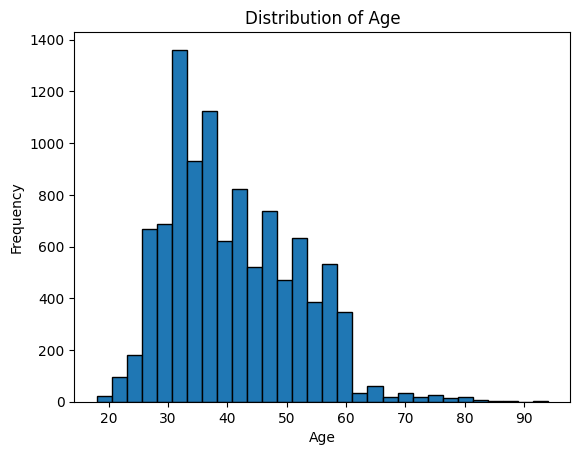

In [24]:
#首先可以看看age的柱形图分别
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show() 

In [ ]:
#里面符合正常逻辑，没有小于0的，但是最大年龄是否太大了？，但是其实应该可以保留
#按照业务要求，其实也有90岁以上的老人

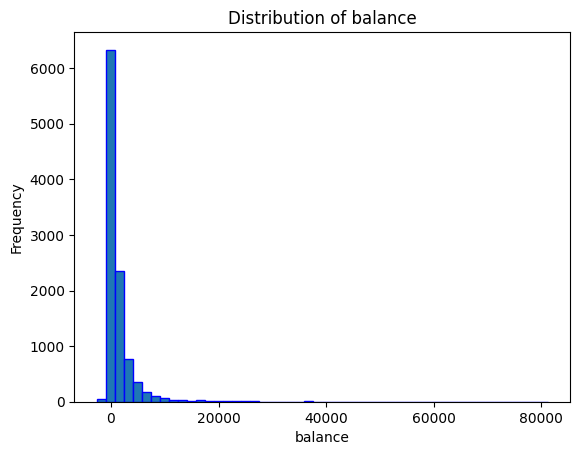

In [30]:
#再看存款balance
plt.hist(df['balance'], bins=50, edgecolor='blue')
plt.title('Distribution of balance')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.show() 

In [33]:
#可以看到其实还是有异常值的，存款为负数，需要处理
#很大的数字，其实是符合逻辑的，少数人有，所以不需要处理
df=df[df['balance']>=0]

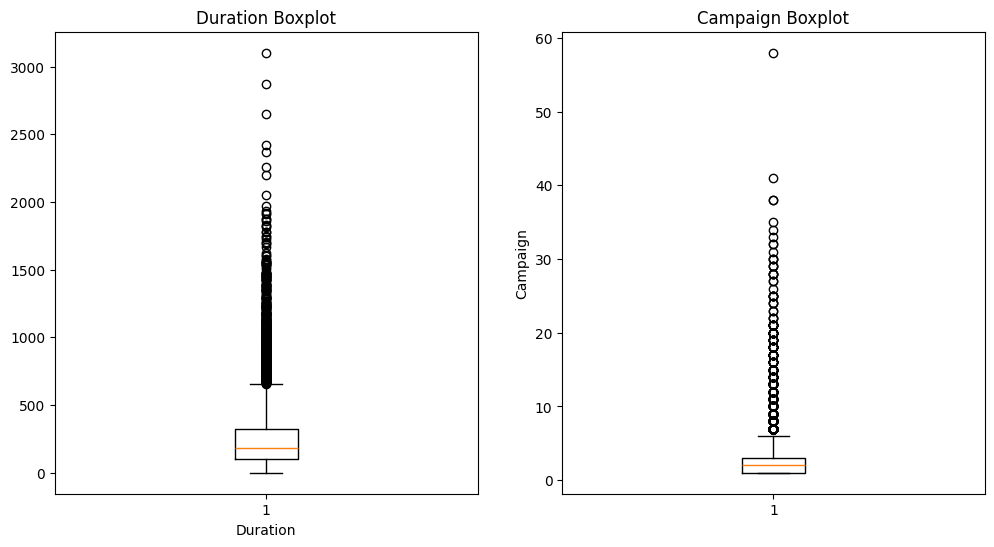

In [36]:
#最后一次交流时长duration和在本次活动中，与该客户交流过的次数campaign
#都可以使用箱线图展示出来
#创建一个图形和两个子图
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.boxplot(df['duration'])
ax1.set_title('Duration Boxplot')
ax1.set_xlabel('Duration')

ax2.boxplot(df['campaign'])
ax2.set_title('Campaign Boxplot')
ax2.set_ylabel('Campaign')
plt.show()

In [40]:
#利用IQR去掉他们两个的异常值
def IQR_d(df,name):
    Q1=df[name].quantile(0.25)
    Q3=df[name].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df=df[(lower<=df[name]) & (upper>=df[name])]
IQR_d(df,'duration')
IQR_d(df,'campaign')
#也处理previous
IQR_d(df,'previous')

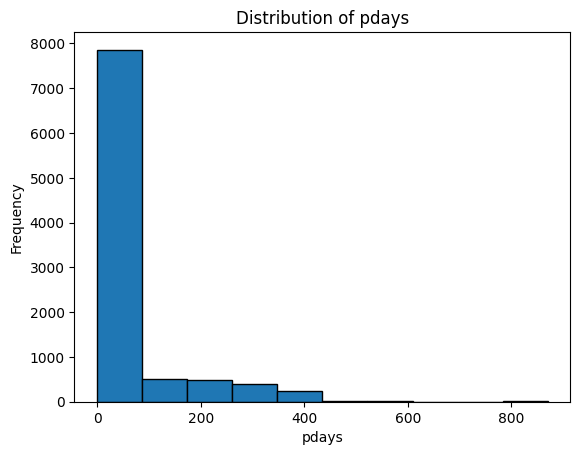

In [44]:
#对于pdays查看他的直方图
plt.hist(df['pdays'],edgecolor='black')
plt.title('Distribution of pdays') 
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show() 

In [46]:
#保证数据大于等于0小于等于999
df=df[(df['pdays']>=0) & (df['pdays']<=999)]

数据清洗完成，现在是干净的数据了，将数据索引更新一下，导出，便于后续的处理

In [49]:
#索引更新
df.index=range(df.shape[0])

In [ ]:
#导出
df.to_csv(r"data/user_shopping.csv")